<a href="https://colab.research.google.com/github/akshith-12/movies_website/blob/main/Datamining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Uploading /getting csv file

In [3]:
uploaded = pd.read_csv("/content/adult.csv")

In [4]:
import pandas as pd
import io
income_df=pd.read_csv("/content/adult.csv")
print(income_df)
income_df.describe()

       age  workclass  fnlwgt     education  educational-num  \
0       25    Private  226802          11th                7   
1       38    Private   89814       HS-grad                9   
2       28  Local-gov  336951    Assoc-acdm               12   
3       44    Private  160323  Some-college               10   
4       18          ?  103497  Some-college               10   
...    ...        ...     ...           ...              ...   
28850   25    Private   66935       HS-grad                9   
28851   20    Private  344278          11th                7   
28852   29    Private  108574     Assoc-voc               11   
28853   56    Private  244605       HS-grad                9   
28854   45    Private  363677     Doctorate               16   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,28855.000000,2.885500e+04,28855.000000,28854.000000,28854.000000,28854.000000
mean,38.634344,1.897565e+05,10.073575,1070.827892,88.328273,40.442608
std,13.742880,1.054501e+05,2.559413,7463.025745,403.260391,12.384877
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781090e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.384100e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df=income_df.copy()
for i in df.columns:
    df[i][df[i]=="?"]=None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.isna().sum()

age                   0
workclass          1695
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1701
relationship          1
race                  1
gender                1
capital-gain          1
capital-loss          1
hours-per-week        1
native-country      498
income                1
dtype: int64

In [7]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        2
        ..
28850    0
28851    0
28852    0
28853    0
28854    9
Length: 28855, dtype: int64

# DATA VISUALIZATION

In [8]:
#This is a visualization of missing data in the dataset
import seaborn as sns


In [9]:
d1=df.dropna()
print(d1.shape)

(26688, 15)


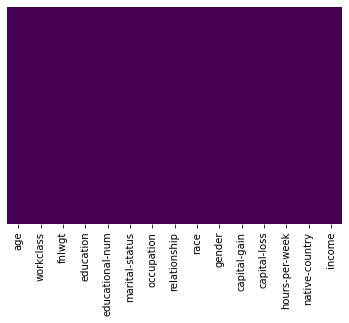

In [10]:
# Now our dataset is clean
sns.heatmap(d1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

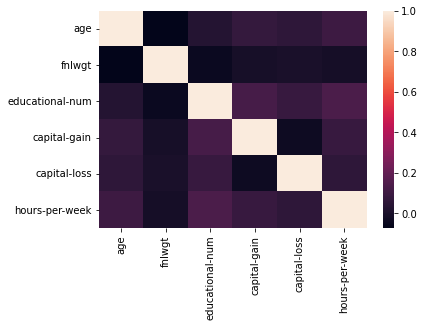

In [11]:
sns.heatmap(d1.corr())

AxesSubplot(0.125,0.125;0.775x0.755)


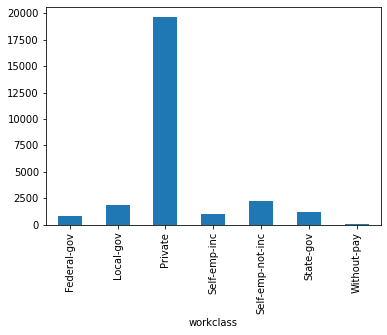

In [12]:
print(d1.groupby('workclass').workclass.count().plot(kind="bar"))
#like this we can draw bar graph for all columns to know which particular group is effecting persons income.

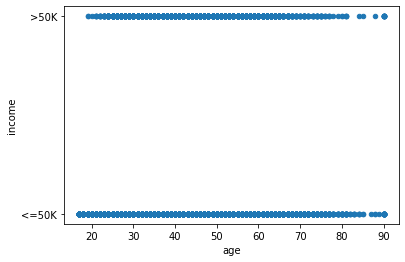

In [13]:
#scatterplot
d1.plot(kind='scatter', x='age',y='income');
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


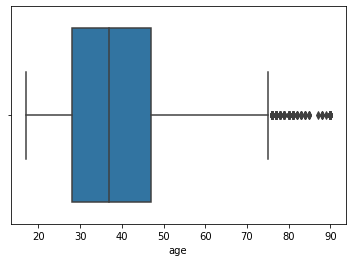

In [14]:
sns.boxplot(d1['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


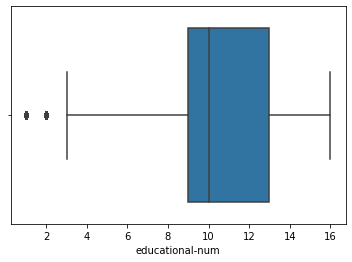

In [15]:
sns.boxplot(d1['educational-num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


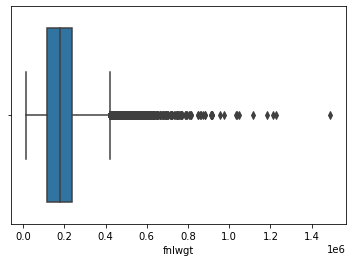

In [16]:
sns.boxplot(d1['fnlwgt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


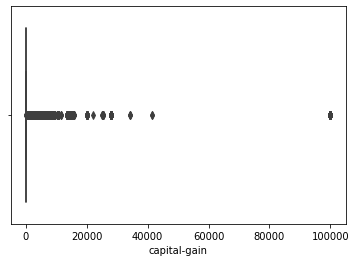

In [17]:
sns.boxplot(d1['capital-gain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


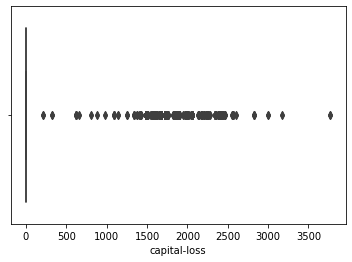

In [18]:
sns.boxplot(d1['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


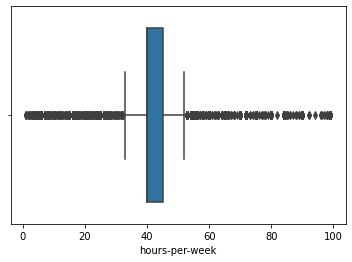

In [19]:
sns.boxplot(d1['hours-per-week'])

# Preprocessing the dataset

In [20]:
#Removing outliers
Q1=d1.quantile(0.25)
Q3=d1.quantile(0.75)
IQR=Q3-Q1
df12=d1.copy()
df13=df12[~((df12<(Q1-1.5*IQR))|(df12>(Q3+1.5*IQR))).any(axis=1)]
#df_out1.drop(df_out,inplace=True)
print(df13.shape)#12074,15

#so lot of is going to be deleted if we remove them

(16375, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [21]:
df13

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,Local-gov,204447,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,43.0,United-States,>50K
28850,25,Private,66935,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K
28851,20,Private,344278,11th,7,Separated,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
28852,29,Private,108574,Assoc-voc,11,Never-married,Priv-house-serv,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K


# Recoding the Categorical columns.

In [22]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [23]:
d1['race']= label_encoder.fit_transform(d1['race']) #for column race
  
d1['race'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 4, 3, 0, 1])

In [24]:
d1['workclass'].dtype
d1['workclass']= label_encoder.fit_transform(d1['workclass']) #for workclass column
  
d1['workclass'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2, 1, 4, 0, 5, 3, 6])

In [25]:
d1['educational-num']= label_encoder.fit_transform(d1['educational-num']) #for educational-nu column
  
d1['educational-num'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 6,  8, 11,  9,  5, 14,  3, 12, 13,  2, 10,  4, 15,  7,  1,  0])

In [26]:
d1['occupation']= label_encoder.fit_transform(d1['occupation']) 
  
d1['occupation'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 6,  4, 10,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [27]:
d1['relationship']= label_encoder.fit_transform(d1['relationship']) 
  
d1['relationship'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([3, 0, 1, 4, 5, 2])

In [28]:
d1['marital-status']= label_encoder.fit_transform(d1['marital-status']) 
  
d1['marital-status'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([4, 2, 6, 5, 0, 3, 1])

In [29]:
d1['native-country']= label_encoder.fit_transform(d1['native-country']) 
  
df['native-country'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['United-States', None, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', nan],
      dtype=object)

In [30]:
set(d1.education)

{'10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Preschool',
 'Prof-school',
 'Some-college'}

In [31]:
d1['education']= label_encoder.fit_transform(d1['education']) 
  
d1['education'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [32]:
d1['income']= label_encoder.fit_transform(d1['income']) 
  
d1['income'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([0, 1])

In [33]:
d1['gender']= label_encoder.fit_transform(d1['gender']) 
  
d1['gender'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 0])

In [34]:
d1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,6,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814,11,8,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951,7,11,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,160323,15,9,2,6,0,2,1,7688.0,0.0,40.0,37,1
5,34,2,198693,0,5,4,7,1,4,1,0.0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,1,204447,12,13,2,3,0,4,1,0.0,0.0,43.0,37,1
28850,25,2,66935,11,8,4,2,1,4,1,0.0,0.0,35.0,37,0
28851,20,2,344278,1,6,5,7,3,4,0,0.0,0.0,40.0,37,0
28852,29,2,108574,8,10,4,8,3,4,0,0.0,0.0,40.0,37,0


In [35]:
d2=d1.copy()
d2


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,6,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814,11,8,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951,7,11,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,160323,15,9,2,6,0,2,1,7688.0,0.0,40.0,37,1
5,34,2,198693,0,5,4,7,1,4,1,0.0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,1,204447,12,13,2,3,0,4,1,0.0,0.0,43.0,37,1
28850,25,2,66935,11,8,4,2,1,4,1,0.0,0.0,35.0,37,0
28851,20,2,344278,1,6,5,7,3,4,0,0.0,0.0,40.0,37,0
28852,29,2,108574,8,10,4,8,3,4,0,0.0,0.0,40.0,37,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


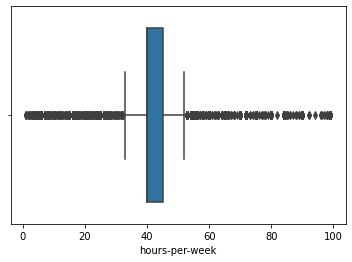

In [36]:
sns.boxplot(d2['hours-per-week'])

# Random Forest

In [37]:
#next step is to standardize our data - using MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(d1)
d1 = pd.DataFrame(scaler.transform(d1), index=d1.index, columns=d1.columns)
d1.iloc[:]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0.333333,0.144430,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.051677,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.219011,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,0.099418,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1.0
5,0.232877,0.333333,0.125398,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.493151,0.166667,0.129294,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.428571,0.948718,1.0
28850,0.109589,0.333333,0.036186,0.733333,0.533333,0.666667,0.153846,0.2,1.0,1.0,0.000000,0.0,0.346939,0.948718,0.0
28851,0.041096,0.333333,0.223972,0.066667,0.400000,0.833333,0.538462,0.6,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0
28852,0.164384,0.333333,0.064379,0.533333,0.666667,0.666667,0.615385,0.6,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0


In [38]:
y = d1.iloc[:,-1]
X= d1.iloc[:,:-1]

In [39]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,0.333333,0.144430,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.051677,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.219011,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,0.099418,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718
5,0.232877,0.333333,0.125398,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.493151,0.166667,0.129294,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.428571,0.948718
28850,0.109589,0.333333,0.036186,0.733333,0.533333,0.666667,0.153846,0.2,1.0,1.0,0.000000,0.0,0.346939,0.948718
28851,0.041096,0.333333,0.223972,0.066667,0.400000,0.833333,0.538462,0.6,1.0,0.0,0.000000,0.0,0.397959,0.948718
28852,0.164384,0.333333,0.064379,0.533333,0.666667,0.666667,0.615385,0.6,1.0,0.0,0.000000,0.0,0.397959,0.948718


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_predict = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
#Confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm
print('The accuracy of the Random Forest Model is', score_randomforest)
print('Predicted values of income are:',y_predict)

The accuracy of the Random Forest Model is 0.8490071187710753
Predicted values of income are: [0. 0. 0. ... 1. 0. 0.]


In [44]:
y_predict

array([0., 0., 0., ..., 1., 0., 0.])

# Accuracy for RandomForest before preprocessing.

In [45]:
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8490071187710753


# KNN

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(d1)
x=pd.DataFrame(d1)

In [47]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [48]:
y_predict = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

#accuracy_score(y_test,y_predict)

array([[3682,  359],
       [ 558,  739]])

# Accuracy For Knn before complete preprocessing

In [49]:
 accuracy_score(y_test,y_predict)

0.8282128137879355

# Support vector Machine(SVM)

In [50]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear')

In [51]:
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [52]:
y_pred=clf.predict(X_test) 

In [53]:
print('Predicted values for income using svm are:',y_pred)

Predicted values for income using svm are: [0. 0. 0. ... 0. 0. 0.]


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[3682,  359],
       [ 558,  739]])

# Accuracy For SVM Before Preprocessing

In [55]:
from sklearn import metrics 
print("Support vector machine model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Support vector machine model accuracy(in %): 80.9666541775946


# Naives Bayes Classifier


In [56]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = gnb.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[3682,  359],
       [ 558,  739]])

# Accuracy for Naive Bayes Before Preprcessing

In [59]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 80.27351067815661


# Decision Tree

In [60]:
dtree=DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
predictions=dtree.predict(X_test)

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4041
         1.0       0.59      0.59      0.59      1297

    accuracy                           0.80      5338
   macro avg       0.73      0.73      0.73      5338
weighted avg       0.80      0.80      0.80      5338



# Accuracy Of Decision Tree before Pre Processing

In [64]:
accuracy_score( y_test, predictions)

0.8010490820532035

In [149]:
from IPython.display import Image

from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

features = list(d1.columns[0:])
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

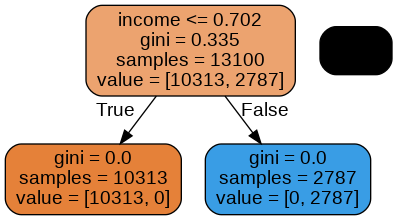

In [150]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# After preprocessing

In [69]:
q1=d2['age'].quantile(0.25)
q2=d2['age'].quantile(0.75)
d2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,6,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814,11,8,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951,7,11,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,160323,15,9,2,6,0,2,1,7688.0,0.0,40.0,37,1
5,34,2,198693,0,5,4,7,1,4,1,0.0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,1,204447,12,13,2,3,0,4,1,0.0,0.0,43.0,37,1
28850,25,2,66935,11,8,4,2,1,4,1,0.0,0.0,35.0,37,0
28851,20,2,344278,1,6,5,7,3,4,0,0.0,0.0,40.0,37,0
28852,29,2,108574,8,10,4,8,3,4,0,0.0,0.0,40.0,37,0


In [70]:
q1=d2['age'].quantile(0.25)
q2=d2['age'].quantile(0.50)
q3=d2['age'].quantile(0.75)
IQR1=q3-q1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

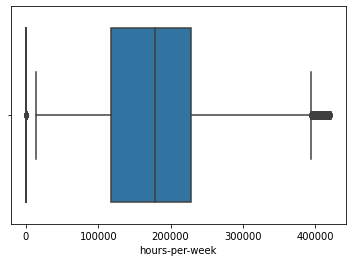

In [71]:
#Replacing outliers with median values.
#age
d2['age']=np.where(d2['age']<(q1-1.5*IQR1),q2,d2['age'])
d2['age']=np.where(d2['age']>(q3+1.5*IQR1),q2,d2['age'])
d2['age']
sns.boxplot(d2['age'])
#fnlwgt
q12=d2['fnlwgt'].quantile(0.25)
q22=d2['fnlwgt'].quantile(0.50)
q33=d2['fnlwgt'].quantile(0.75)
IQR2=q33-q12
d2['fnlwgt']=np.where(d2['fnlwgt']<(q12-1.5*IQR2),q22,d2['fnlwgt'])
d2['fnlwgt']=np.where(d2['fnlwgt']>(q33+1.5*IQR2),q22,d2['fnlwgt'])
d2['fnlwgt']
sns.boxplot(d2['fnlwgt'])
#capital-gain
q13=d2['capital-gain'].quantile(0.25)
q23=d2['capital-gain'].quantile(0.50)
q333=d2['capital-gain'].quantile(0.75)
IQR3=q333-q13
d2['capital-gain']=np.where(d2['capital-gain']<(q13-1.5*IQR3),q23,d2['capital-gain'])
d2['capital-gain']=np.where(d2['capital-gain']>(q333+1.5*IQR3),q23,d2['capital-gain'])
d2['capital-gain']
sns.boxplot(d2['capital-gain'])
#capital-loss
q14=d2['capital-loss'].quantile(0.25)
q24=d2['capital-loss'].quantile(0.50)
q34=d2['capital-loss'].quantile(0.75)
IQR4=q34-q14
d2['capital-loss']=np.where(d2['capital-loss']<(q14-1.5*IQR4),q24,d2['capital-loss'])
d2['capital-loss']=np.where(d2['capital-loss']>(q34+1.5*IQR4),q24,d2['capital-loss'])
d2['capital-loss']
sns.boxplot(d2['capital-loss'])
q15=d2['hours-per-week'].quantile(0.25)
q25=d2['hours-per-week'].quantile(0.50)
q35=d2['hours-per-week'].quantile(0.75)
IQR5=q35-q15
d2['hours-per-week']=np.where(d2['hours-per-week']<(q15-1.5*IQR5),q25,d2['hours-per-week'])
d2['hours-per-week']=np.where(d2['hours-per-week']>(q35+1.5*IQR5),q25,d2['hours-per-week'])
d2['hours-per-week']
sns.boxplot(d2['hours-per-week'])





In [73]:
d2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.137931,0.333333,0.523556,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.0,0.0,0.368421,0.948718,0.0
1,0.362069,0.333333,0.187328,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.894737,0.948718,0.0
2,0.189655,0.166667,0.793911,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718,1.0
3,0.465517,0.333333,0.360388,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.0,0.0,0.368421,0.948718,1.0
5,0.293103,0.333333,0.454565,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.0,0.0,0.368421,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.620690,0.166667,0.468687,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.526316,0.948718,1.0
28850,0.137931,0.333333,0.131173,0.733333,0.533333,0.666667,0.153846,0.2,1.0,1.0,0.0,0.0,0.105263,0.948718,0.0
28851,0.051724,0.333333,0.811894,0.066667,0.400000,0.833333,0.538462,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0
28852,0.206897,0.333333,0.233373,0.533333,0.666667,0.666667,0.615385,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0


# Random Forest

In [72]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(d2)
d2 = pd.DataFrame(scaler.transform(d2), index=d2.index, columns=d2.columns)
d2.iloc[:]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.137931,0.333333,0.523556,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.0,0.0,0.368421,0.948718,0.0
1,0.362069,0.333333,0.187328,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.894737,0.948718,0.0
2,0.189655,0.166667,0.793911,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718,1.0
3,0.465517,0.333333,0.360388,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.0,0.0,0.368421,0.948718,1.0
5,0.293103,0.333333,0.454565,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.0,0.0,0.368421,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.620690,0.166667,0.468687,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.526316,0.948718,1.0
28850,0.137931,0.333333,0.131173,0.733333,0.533333,0.666667,0.153846,0.2,1.0,1.0,0.0,0.0,0.105263,0.948718,0.0
28851,0.051724,0.333333,0.811894,0.066667,0.400000,0.833333,0.538462,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0
28852,0.206897,0.333333,0.233373,0.533333,0.666667,0.666667,0.615385,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0


In [74]:
y2=d2.iloc[:,-1]
x2=d2.iloc[:,:-1]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=2,shuffle=True)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [78]:
randomforest = RandomForestClassifier()
randomforest.fit(X2_train, y2_train)
#y_pred = randomforest.predict(X_test)
y2_predict=randomforest.predict(X2_test)
score_randomforest2 = randomforest.score(X2_test,y2_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y2_predict)
cm


array([[3645,  395],
       [ 608,  690]])

# Accuracy For RandomForest after Preprocessing

In [79]:
print('The accuracy of the Random Forest Model is',score_randomforest2*100,'%')
print("predicted values are:",y2_predict)

The accuracy of the Random Forest Model is 81.21019108280255 %
predicted values are: [0. 0. 0. ... 1. 0. 0.]


# KNN

In [80]:
d2['income'].unique()

array([0., 1.])

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(d2)
x2=pd.DataFrame(d2)

In [82]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors=15)
classifier.fit(X2_train,y2_train)

KNeighborsClassifier(n_neighbors=15)

In [83]:
y2_predict = classifier.predict(X2_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y2_predict)
cm

array([[4003,    0],
       [   8, 1327]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y2_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4003
         1.0       1.00      0.99      1.00      1335

    accuracy                           1.00      5338
   macro avg       1.00      1.00      1.00      5338
weighted avg       1.00      1.00      1.00      5338



# Accuracy For KNN after Preprocessing

In [85]:
print("K-Nearest Neighbours model accuracy(in %):",metrics.accuracy_score(y2_test,y2_predict)*100)

K-Nearest Neighbours model accuracy(in %): 99.85013113525665


In [ ]:
print("Predicted values are:",y2_predict)

In [87]:
error_rate=[]    #will take some time 
#this for understanding of good k value.
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train,y2_train)
    pred_i = knn.predict(X2_test)
    error_rate.append(np.mean(pred_i != y2_test))

Text(0, 0.5, 'Error Rate')

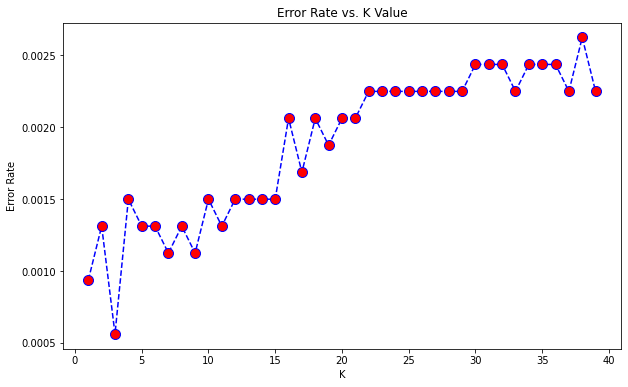

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Supoport Vector Machine

In [89]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear')

In [90]:
clf.fit(X2_train, y2_train) 

SVC(kernel='linear')

# Accuracy For SVM after Preprocessing

In [91]:
y2_predict=clf.predict(X2_test)
from sklearn import metrics 
print("Support vector machine model accuracy(in %):", metrics.accuracy_score(y2_test, y2_predict)*100)

Support vector machine model accuracy(in %): 100.0


In [92]:
print('predicted values are:',y2_predict)

predicted values are: [0. 0. 1. ... 0. 0. 1.]


# Naives Bayes Classifier

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X2_train, y2_train)

GaussianNB()

In [94]:
y2_pred = gnb.predict(X2_test)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y2_predict)
cm

array([[4003,    0],
       [   0, 1335]])

# Accuracy For Naive Bayes after Preprocessing

In [96]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y2_test, y2_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


# Decision Tree

In [97]:
dtree=DecisionTreeClassifier()

In [98]:
dtree.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [99]:
predictions=dtree.predict(X2_test)

In [100]:
print(classification_report(y2_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4003
         1.0       1.00      1.00      1.00      1335

    accuracy                           1.00      5338
   macro avg       1.00      1.00      1.00      5338
weighted avg       1.00      1.00      1.00      5338



# Accuracy For RandomForest After Preprocessing

In [101]:
accuracy_score( y2_test, predictions)*100

100.0

In [151]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(d2.columns[0:])
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

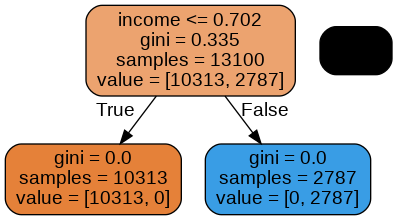

In [152]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# After Removing Outliers Pre-processing and prediction

In [103]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df13['race']= label_encoder.fit_transform(df13['race']) 
df13['race'].unique()
#workclass
df13['workclass'].dtype
df13['workclass']= label_encoder.fit_transform(df13['workclass']) 
df13['workclass'].unique()
#educational-num
df13['educational-num']= label_encoder.fit_transform(df13['educational-num']) 
df13['educational-num'].unique()
#occupation
df13['occupation']= label_encoder.fit_transform(df13['occupation']) 
df13['occupation'].unique()
#relationship
df13['relationship']= label_encoder.fit_transform(df13['relationship']) 
df13['relationship'].unique()
#marital-status
df13['marital-status']= label_encoder.fit_transform(df13['marital-status']) 
df13['marital-status'].unique()
#native-country
df13['native-country']= label_encoder.fit_transform(df13['native-country']) 
df13['native-country'].unique()
set(df13.education)
#education 
df13['education']= label_encoder.fit_transform(df13['education']) 
df13['education'].unique()
#income
df13['income']= label_encoder.fit_transform(df13['income']) 
  
df13['income'].unique()
#gender
df13['gender']= label_encoder.fit_transform(df13['gender']) 
  
df13['gender'].unique()

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

array([1, 0])

In [104]:
df13

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,4,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814,10,6,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951,6,9,2,10,0,4,1,0.0,0.0,40.0,37,1
8,24,2,369667,13,7,4,7,4,4,0,0.0,0.0,40.0,37,0
11,36,0,212465,8,10,2,0,0,4,1,0.0,0.0,40.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,1,204447,11,11,2,3,0,4,1,0.0,0.0,43.0,37,1
28850,25,2,66935,10,6,4,2,1,4,1,0.0,0.0,35.0,37,0
28851,20,2,344278,1,4,5,7,3,4,0,0.0,0.0,40.0,37,0
28852,29,2,108574,7,8,4,8,3,4,0,0.0,0.0,40.0,37,0


In [105]:
df13['income'].unique()#array([0.]) means >50k income is lost because no 1 is present.
#so,we should not remove ouliers.


array([0, 1])

In [106]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df13)
df13 = pd.DataFrame(scaler.transform(df13), index=df13.index, columns=df13.columns)
df13.iloc[:]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.137931,0.333333,0.523232,0.076923,0.307692,0.666667,0.461538,0.6,0.5,1.0,0.0,0.0,0.368421,0.948718,0.0
1,0.362069,0.333333,0.186775,0.769231,0.461538,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.894737,0.948718,0.0
2,0.189655,0.166667,0.793770,0.461538,0.692308,0.333333,0.769231,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718,1.0
8,0.120690,0.333333,0.874124,1.000000,0.538462,0.666667,0.538462,0.8,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0
11,0.327586,0.000000,0.488019,0.615385,0.769231,0.333333,0.000000,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.620690,0.166667,0.468326,0.846154,0.846154,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.526316,0.948718,1.0
28850,0.137931,0.333333,0.130582,0.769231,0.461538,0.666667,0.153846,0.2,1.0,1.0,0.0,0.0,0.105263,0.948718,0.0
28851,0.051724,0.333333,0.811766,0.076923,0.307692,0.833333,0.538462,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0
28852,0.206897,0.333333,0.232851,0.538462,0.615385,0.666667,0.615385,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718,0.0


In [107]:
y12=df13.iloc[:,-1]
x12=df13.iloc[:,:-1]

In [108]:
x12

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.137931,0.333333,0.523232,0.076923,0.307692,0.666667,0.461538,0.6,0.5,1.0,0.0,0.0,0.368421,0.948718
1,0.362069,0.333333,0.186775,0.769231,0.461538,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.894737,0.948718
2,0.189655,0.166667,0.793770,0.461538,0.692308,0.333333,0.769231,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718
8,0.120690,0.333333,0.874124,1.000000,0.538462,0.666667,0.538462,0.8,1.0,0.0,0.0,0.0,0.368421,0.948718
11,0.327586,0.000000,0.488019,0.615385,0.769231,0.333333,0.000000,0.0,1.0,1.0,0.0,0.0,0.368421,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28849,0.620690,0.166667,0.468326,0.846154,0.846154,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.526316,0.948718
28850,0.137931,0.333333,0.130582,0.769231,0.461538,0.666667,0.153846,0.2,1.0,1.0,0.0,0.0,0.105263,0.948718
28851,0.051724,0.333333,0.811766,0.076923,0.307692,0.833333,0.538462,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718
28852,0.206897,0.333333,0.232851,0.538462,0.615385,0.666667,0.615385,0.6,1.0,0.0,0.0,0.0,0.368421,0.948718


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X12_train, X12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=0.2, random_state=2,shuffle=True)

In [111]:
y12_train

3872     0.0
1826     0.0
9748     0.0
12538    1.0
8466     0.0
        ... 
20796    0.0
24527    0.0
11589    1.0
4520     0.0
12876    0.0
Name: income, Length: 13100, dtype: float64

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# RandomForest After Preprocessing and removing Outliers

In [113]:
randomforest = RandomForestClassifier()
randomforest.fit(X12_train, y12_train)
#y_pred = randomforest.predict(X_test)
y1_predict=randomforest.predict(X12_test)
score_randomforest1 = randomforest.score(X12_test,y12_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y12_test,y1_predict)
cm
print('The accuracy of the Random Forest Model is', score_randomforest1*100)

The accuracy of the Random Forest Model is 82.3206106870229


# Classification report

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y12_test,y1_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      2559
         1.0       0.62      0.48      0.54       716

    accuracy                           0.82      3275
   macro avg       0.74      0.70      0.72      3275
weighted avg       0.81      0.82      0.81      3275



## Accuracy For RandomForest after complete preprocessing and removing outliers

In [115]:
print('The accuracy of the Random Forest Model is', score_randomforest1)

The accuracy of the Random Forest Model is 0.823206106870229


# KNN

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x12=sc.fit_transform(df13)
x12=pd.DataFrame(df13)

In [117]:
from sklearn.model_selection import train_test_split
X12_train,X12_test,y12_train,y12_test=train_test_split(x12,y12,test_size=0.2)
X12_train = sc.fit_transform(X12_train)
X12_test = sc.transform(X12_test)
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors=15)
classifier.fit(X12_train,y12_train)

KNeighborsClassifier(n_neighbors=15)

In [118]:
y1_predict = classifier.predict(X12_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y12_test,y1_predict)
cm
#accuracy_score(y12_test,y1_predict)


array([[2596,    0],
       [   7,  672]])

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y12_test,y1_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2596
         1.0       1.00      0.99      0.99       679

    accuracy                           1.00      3275
   macro avg       1.00      0.99      1.00      3275
weighted avg       1.00      1.00      1.00      3275



# Accuracy for Knn after complete preprocessing and removing outliers


In [120]:
accuracy_score(y12_test,y1_predict)


0.9978625954198473

In [121]:
print("Predicted values are:",y1_predict)

Predicted values are: [0. 0. 0. ... 0. 0. 1.]


# Support Vector Machine(SVM)

In [122]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear')

In [123]:
clf.fit(X12_train, y12_train) 

SVC(kernel='linear')

In [124]:
y12_pred=clf.predict(X12_test) 

# Accuracy For SVM After Preprocessing and removing outliers


In [125]:
from sklearn import metrics 
print("Support vector machine model accuracy(in %):", metrics.accuracy_score(y12_test, y12_pred)*100)

Support vector machine model accuracy(in %): 100.0


In [126]:
print("Predicted values are:",y12_pred)

Predicted values are: [0. 0. 0. ... 0. 0. 1.]


# Naive Bayes classifier

In [127]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X12_train, y12_train)

GaussianNB()

In [128]:
y12_pred = gnb.predict(X12_test)

# Accuracy For Naive Bayes After Preprocessing and removing outliers


In [129]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y12_test, y12_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


# Decision Tree

In [130]:
dtree=DecisionTreeClassifier()

In [131]:
dtree.fit(X12_train,y12_train)

DecisionTreeClassifier()

In [132]:
predictions=dtree.predict(X12_test)

In [133]:
print(classification_report(y12_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2596
         1.0       1.00      1.00      1.00       679

    accuracy                           1.00      3275
   macro avg       1.00      1.00      1.00      3275
weighted avg       1.00      1.00      1.00      3275



# Accuracy For Decision tree after Preprocessing and removing outliers


In [134]:
accuracy_score( y12_test, predictions)*100

100.0

In [135]:
dtree.score(X12_train,y12_train)

1.0

In [136]:
print('The predicted values are:',predictions)

The predicted values are: [0. 0. 0. ... 0. 0. 1.]


In [137]:
sum(df13["income"]==1)

3466

# Neural Networks

In [138]:
from sklearn.neural_network import MLPClassifier

In [139]:
from sklearn.datasets import make_classification

In [140]:
from sklearn.model_selection import train_test_split


In [141]:
 X, y = make_classification(n_samples=100, random_state=1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

In [143]:
clf = MLPClassifier(random_state=1, max_iter=300,learning_rate_init=0.3).fit(X_train, y_train)
clf.predict_proba(X_test[:1])


array([[0., 1.]])

In [144]:
clf.predict(X_test[:5, :])

array([1, 0, 1, 1, 1])

In [145]:
print("Neral Networks:",clf.score(X_test, y_test)*100)

Neral Networks: 92.0


In [146]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from skfuzzy import control as ctrl


ModuleNotFoundError: ignored